In [76]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

import pymc3 as pm
import warnings
warnings.filterwarnings("ignore")

In [78]:
d_v = np.linspace(0, 1, 100)
d_v = np.array([0.1 * i for i in range(10)])
e_v = [np.round(1 - x, 3) for x in d_v]
d_e = d_v / e_v

Only 10 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [noise]
Sampling 2 chains: 100%|██████████| 1020/1020 [00:00<00:00, 1806.20draws/s]
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.


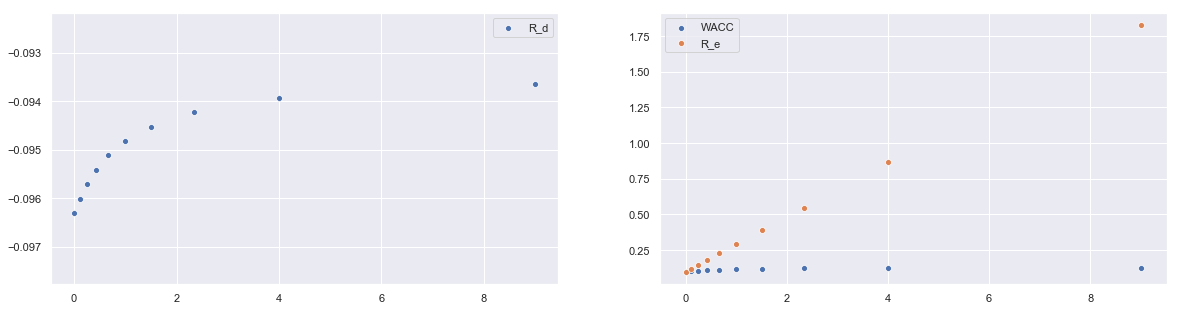

In [101]:
# Sample cost of debt from distribution
with pm.Model():
    noise = pm.Normal('noise', mu=0, sigma=0.00001)
    trace = [x['noise'] for x in pm.sample(len(d_v))]
    
    trace = sorted(trace)
    r_d = np.array([0.06 + e for e in trace])

# Assume constante cost of debt
# r_d = np.array([0.06 for_ in d_v])

# Cost of capital: r = r_d * d/v + r_e * e/v
r = 0.0984
tax_shield = .35
r_e = r + (r - r_d) * d_e
wacc = r_d * (1 - tax_shield) * d_v + r_e * e_v
df = pd.DataFrame(data={
    'd_v': d_v, 'e_v': e_v, 'd_e': d_e, 'r_d': r_d, 'r_e': r_e, 'wacc': wacc
})
fig, ax = plt.subplots(figsize=(20, 5), ncols=2, nrows=1)
sns.scatterplot(data=df, x=d_e, y=r_d, ax=ax[0], label='R_d')
sns.scatterplot(data=df, x=d_e, y=wacc, ax=ax[1], label='WACC')
sns.scatterplot(data=df, x=d_e, y=r_e, ax=ax[1], label='R_e')
